In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression


Introduction: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; This project was undertaken for a variety of reasons, but in particular because I was curious as to if how well a student will perform on a test can be predicted based on a variety of factors. This data set seemed well suited to attempt to answer that question, having a variety of features that might affect a students performance in testing and then the students scores in three different subjects. In addition, the data set was of significant size, which made it very attractive to work with. Unfortunately the data set was a simulated one but I was still very interested in the topic. The overall research question was to see if there is any correlation between any of these variables and test scores, if so which ones were significant, and if it is possible to accurately predict test scores from these features with a linear regression model.

In [20]:
df = pd.read_csv('StudentsPerformance[1].csv')
print(df)

     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
5    female        group B          associate's degree      standard   
6    female        group B                some college      standard   
7      male        group B                some college  free/reduced   
8      male        group D                 high school  free/reduced   
9    female        group B                 high school  free/reduced   
10     male        group C          associate's degree      standard   
11     male        group D          associate's degree      standard   
12   female        group B                 high school      stan

Data Selection/Munging: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The data set was sourced from Kaggle and contains 8 different features. In order they are:
Gender: State's whether student was either female or male<br>
race/ethnicity: Which ethnicity grouping the student is in<br>
parental level of education: Highest education level completed by a parent<br>
lunch: What lunch/lunch plan the student had<br>
test preparation course: Did the student complete a test preparation course<br>
math score: The score acheived on the math test<br>
reading score: The score acheived on the reading test<br>
writing score: The score acheived on the writing test<br>
Due to the data set being generated, no imputation or filling of missing values was necessary, but I did create several new features. These features are:
score_mean: An average of the three scores, used as a general estimator for how well a child scored <br>
someDegree: A boolean being a 1 if the parent had some level of college completed, and a 0 otherwise <br>
<br>
In addition to this, I created dummy/indicator variables for all of the columns with strings, so as to use them in a regression model later on.

In [23]:
#creating score_mean
col = df.loc[: , "math score":"writing score"]
df['score_mean'] = col.mean(axis=1)
#creating Dummy Variables
df2=pd.get_dummies(df)
#Creating someDegree
df2['someDegree'] = 0
df2.loc[df2["parental level of education_associate's degree"]==1, 'someDegree'] = 1
df2.loc[df2["parental level of education_bachelor's degree"]==1, 'someDegree'] = 1
df2.loc[df2["parental level of education_master's degree"]==1, 'someDegree'] = 1
df2

,math score,reading score,writing score,score_mean,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,...,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none,someDegree
0,72,72,74,72.666667,1,0,0,1,0,0,...,1,0,0,0,0,0,1,0,1,1
1,69,90,88,82.333333,1,0,0,0,1,0,...,0,0,0,1,0,0,1,1,0,0
2,90,95,93,92.666667,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,1
3,47,57,44,49.333333,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,1,1
4,76,78,75,76.333333,0,1,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0
5,71,83,78,77.333333,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,1
6,88,95,92,91.666667,1,0,0,1,0,0,...,0,0,0,1,0,0,1,1,0,0
7,40,43,39,40.666667,0,1,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0
8,64,64,67,65.000000,0,1,0,0,0,1,...,0,1,0,0,0,1,0,1,0,0
9,38,60,50,49.333333,1,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0


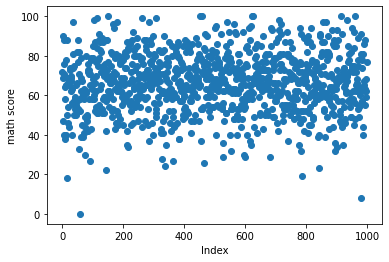

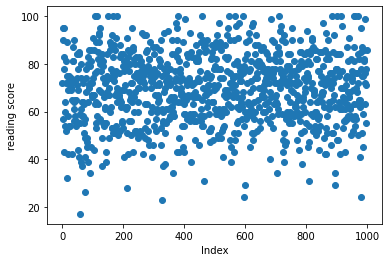

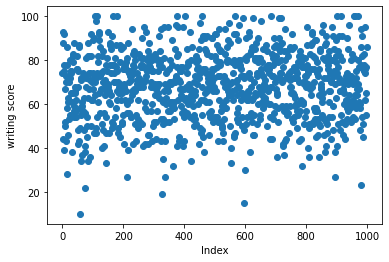

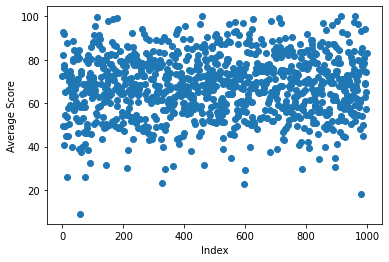

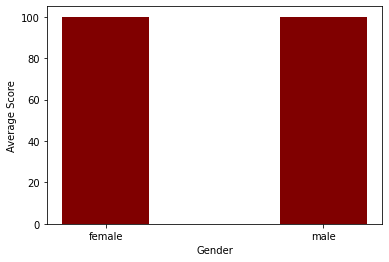

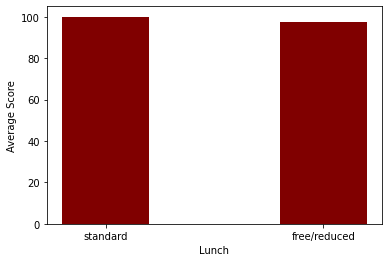

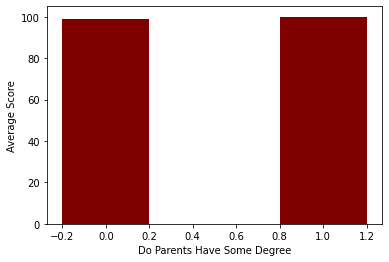

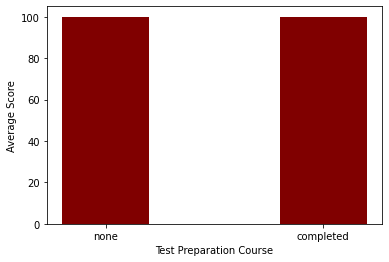

                                   score_mean  gender_male  lunch_standard  \
score_mean                           1.000000    -0.130861        0.290064   
gender_male                         -0.130861     1.000000        0.021372   
lunch_standard                       0.290064     0.021372        1.000000   
test preparation course_completed    0.256710     0.006028       -0.017044   
someDegree                           0.176717    -0.033994       -0.014318   
race/ethnicity_group A              -0.104803     0.071001       -0.032329   
race/ethnicity_group B              -0.078247    -0.028466       -0.008257   
race/ethnicity_group C              -0.030691    -0.063368       -0.003385   
race/ethnicity_group D               0.058902     0.030566       -0.009458   

                                   test preparation course_completed  \
score_mean                                                  0.256710   
gender_male                                                 0.006028   
lun

In [24]:
#Analysis

#looking at trends in test scores, particularly for outliers
plt.scatter(df.index,df['math score'])
plt.xlabel('Index')
plt.ylabel('math score')
plt.show()

plt.scatter(df.index,df['reading score'])
plt.xlabel('Index')
plt.ylabel('reading score')
plt.show()

plt.scatter(df.index,df['writing score'])
plt.xlabel('Index')
plt.ylabel('writing score')
plt.show()

plt.scatter(df.index,df['score_mean'])
plt.xlabel('Index')
plt.ylabel('Average Score')
plt.show()
#They all look pretty similar, likely that students score similarly across all tests

#checking bar plots to gauge correlation
plt.bar(df["gender"], df["score_mean"], color ='maroon', width = 0.4)
plt.xlabel('Gender')
plt.ylabel("Average Score")
plt.show()

plt.bar(df["lunch"], df["score_mean"], color ='maroon', width = 0.4)
plt.xlabel('Lunch')
plt.ylabel("Average Score")
plt.show()

plt.bar(df2["someDegree"], df2["score_mean"], color ='maroon', width = 0.4)
plt.xlabel('Do Parents Have Some Degree')
plt.ylabel("Average Score")
plt.show()

plt.bar(df["test preparation course"], df["score_mean"], color ='maroon', width = 0.4)
plt.xlabel('Test Preparation Course')
plt.ylabel("Average Score")
plt.show()


#Now checking for correlation with correlation matrix, don't need to use every dummy variable
data=df2.loc[::,["score_mean", "gender_male", "lunch_standard", "test preparation course_completed", "someDegree", "race/ethnicity_group A", "race/ethnicity_group B", "race/ethnicity_group C", "race/ethnicity_group D"]]

correlation_matrix=data.corr()
np.set_printoptions(threshold=100)
print(correlation_matrix)

#This matches the graphs, see no strong correlation, but some mediocre ones in gender, lunch, preparation course, and parents degree.
#also correaltion in race/ethnicity_group A, but much weaker

#First Linear Regression model, use every variable with above |0.10| in the colinearity matrix
gooddata=df2.loc[::,["score_mean", "gender_male", "lunch_standard", "test preparation course_completed", "someDegree", "race/ethnicity_group A"]]

y_data = gooddata['score_mean']

x_data = gooddata.drop('score_mean', axis = 1)

#70/30 training testing split
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.3)

#creating linear regression model from scikitlearn
model = LinearRegression()

model.fit(x_training_data, y_training_data)

#printing results in the form of accuracy/precision and confusion matrix
predictions = model.predict(x_test_data)

mae = mean_absolute_error(y_test_data, predictions)
mse = mean_squared_error(y_test_data, predictions)
rmse = np.sqrt(mse)

print("Model 1: 5 predictors")
print("Mean absolute error: ", mae)
print(f'Mean squared error: ', mse)
print(f'Root mean squared error: ', rmse)
print("\n")

#model 2, drop lowest value in correlation matrix, race/ethnicity_groupA

gooddata=gooddata.drop("race/ethnicity_group A", axis=1)

y_data = gooddata['score_mean']

x_data = gooddata.drop('score_mean', axis = 1)

#70/30 training testing split
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.3)

#creating linear regression model from scikitlearn
model = LinearRegression()

model.fit(x_training_data, y_training_data)

#printing results in the form of accuracy/precision and confusion matrix
predictions = model.predict(x_test_data)

mae = mean_absolute_error(y_test_data, predictions)
mse = mean_squared_error(y_test_data, predictions)
rmse = np.sqrt(mse)

print("Model 2: 4 predictors")
print("Mean absolute error: ", mae)
print(f'Mean squared error: ', mse)
print(f'Root mean squared error: ', rmse)
print("\n")

#model 3, drop next lowest value in correlation matrix, gender

gooddata=gooddata.drop("gender_male", axis=1)

y_data = gooddata['score_mean']

x_data = gooddata.drop('score_mean', axis = 1)

#70/30 training testing split
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.3)

#creating linear regression model from scikitlearn
model = LinearRegression()

model.fit(x_training_data, y_training_data)

#printing results in the form of accuracy/precision and confusion matrix
predictions = model.predict(x_test_data)

mae = mean_absolute_error(y_test_data, predictions)
mse = mean_squared_error(y_test_data, predictions)
rmse = np.sqrt(mse)

print("Model 3: 3 predictors")
print("Mean absolute error: ", mae)
print(f'Mean squared error: ', mse)
print(f'Root mean squared error: ', rmse)
print("\n")

Methods and Materials: <br> 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; I used several methods to analyze this data set, the most important of which was the pandas package for python. I used it to create several new features as well as make indicator variables. To check for outliers and look for correlation, I also used matplotlib in conjunction with pandas. Similarly, I used scikit-learn to create several linear regression models and numpy to help analyze the error of said models. <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; In addition to the python packages, I used Jupyter Notebooks to both write the both the code and the report for this project, and I used several websites that I have cited below to help me understand scikit-learn and regression models, as well as provide further context for this problem.

Results: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; I did find several significant results from this data set resulting the average test scores of the students. I used the averge of all three test scores to gauge performance on tests as it simplified the problem without losing any significant information. The mean of the three test scores was often with a few points of each individual score regardless, and a scatterplot of the mean(as shown below) roughly mirrored a scatterplot of each individual graph. 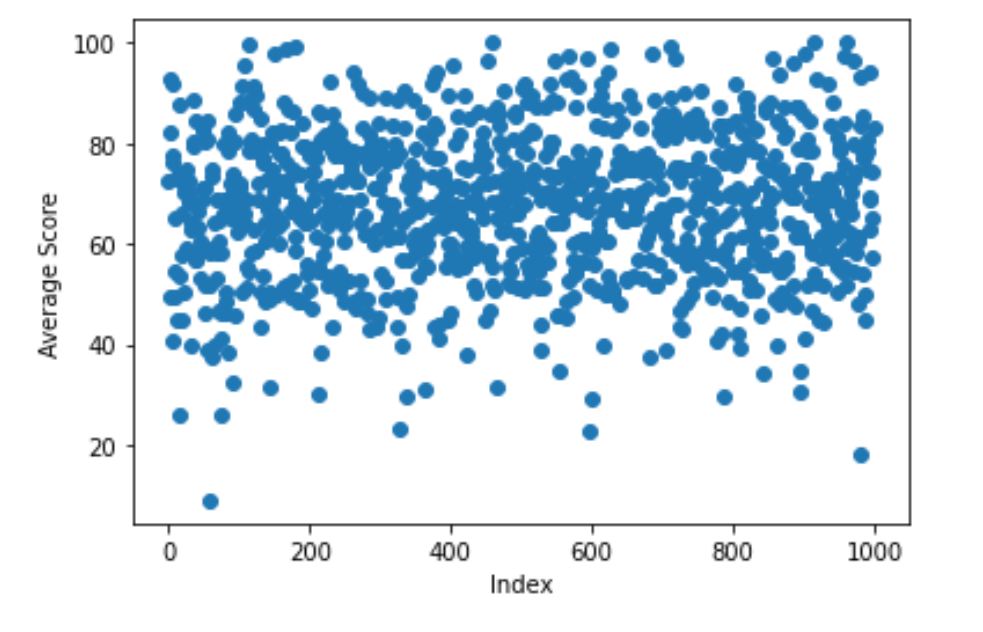
First, I found that there were 5 variables with significant correlation, which I defined a value higher than |0.10| in the correlation matrix, the part with respect to score_mean is shown below.
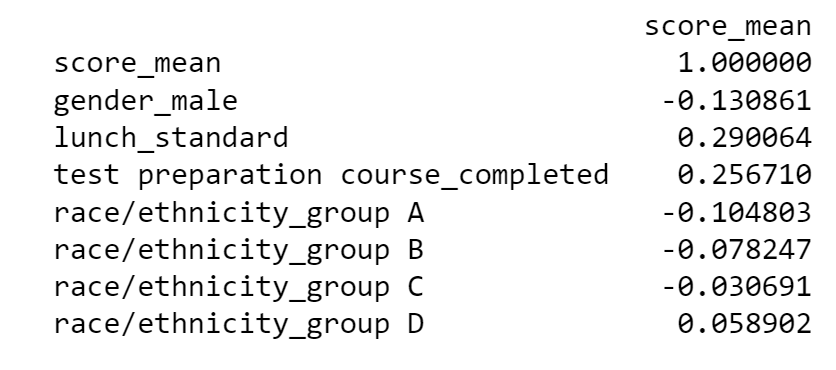These variables, in order from highest to lowest correlation are: whether lunch was standard or not, if the test preparation course was comepleted, ir parents have some degree or not, if the student is male or not, and if the student is a member of race/ethnicity group A or not. Being one of the other ethinicities had little correlation with student test scores, and even race/ethnicity group A is barely significant with a correlation value of -0.105. Since the engineered value someDegree has correlation, we can also assume that the dummy variables it is extrapolated from have some level of correlation as well. <br>
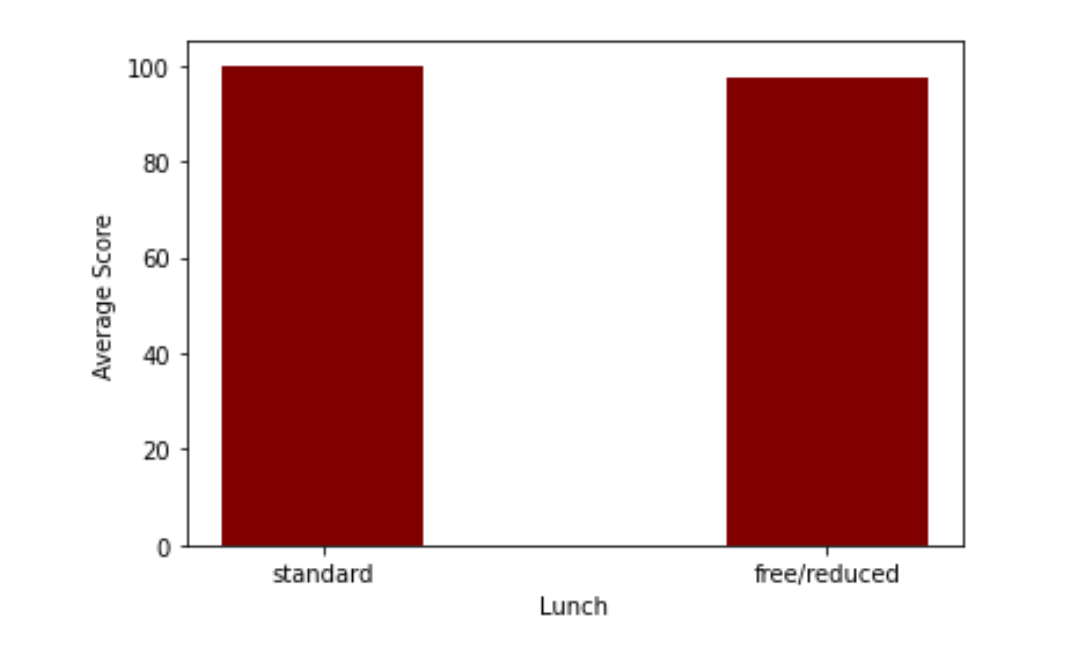
A bar plot showing how a full lunch effects average test scores.
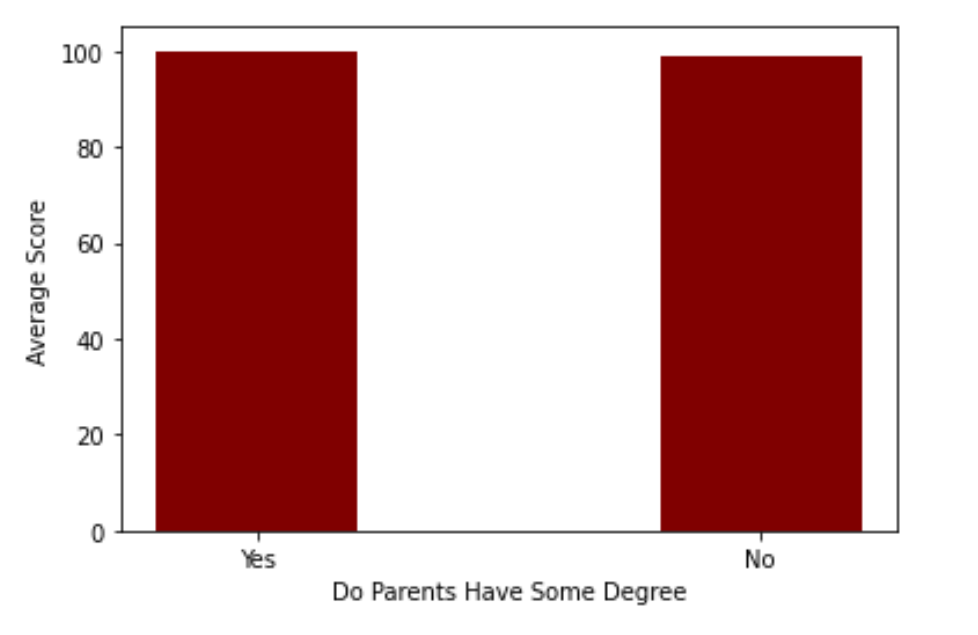
A bar plot showing how if a parent has a degree or not effects test scores. <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; I also created a linear regression model to attempt to predict the test scores, but it had a middling performance. I started with the models with the 5 highest correlation in our correlation matrix. Then calculated the mean absolute error, mean squared error, and root mean squared error. I then repeated the process with by removing the predictor with the least correletion each time I created a new model until I had created three models. None of the models performed exceptionally well, and they all had a relatively similar performance, with the mean square error of the lowest being only about 20 away from the highest. The Root mean squared error of the lowest was also around 0.5 less than the highest, which illustrates the point a little better. I can conclude that linear regression is not a particularly good model to use for predicting average test score with these predictors, given that we have a rather large mean squared error which fails to decrease with the adjustment of predictors.

Discussion and Future Work <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Unfortunately, this data set was generated so no real world conclusions can be gleaned from it. If it were a real data set howevever, we would be able to determine that if the student had a full lunch and if they completed a test preparation course are the two most significant factors to determining performance on all three tests. Next is that a parent having higher education also has an effect, but significantly less than the previous two factors that more directly influence the student. <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Oddly enough, despite the data set being simulated, real world studies have similar findings to my own. Namely, that study time(analogous to test prep course), health(roughly analogous to eating a full lunch), and parental education are all significant factors in how a child performs, amongst a myriad of others not included in my data set. They also agree with the finding that ethnicity has little impact on test performance on its own. Instead factors that correlate with ethnicity, such as wealth or family pressure to perform are what truly impacts academic performance. <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Finally, for future work, I would like to try and improve the predictive model. I believe the best approach to this, given the binary nature of many of our predictors would be either a decision tree or a random forest. Due to time constraints it was not possible to fully explore this model in this project, but it seems like a logical next step given how the features in this data set are set up, especially after the dummy variables are created.

Sources: <br>
Data Set sourced from: <br>
-http://roycekimmons.com/tools/generated_data/exams <br>
Data source found through: <br>
-https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?resource=download <br>
Sites used for learning about machine learning: <br>
-https://stackabuse.com/linear-regression-in-python-with-scikit-learn/ <br>
-https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html <br>
-https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html <br>
Other Research on the Subject <br>
-https://d1wqtxts1xzle7.cloudfront.net/49686973/3-Factors-Affecting-Students-Academic-with-cover-page-v2.pdf?Expires=1669914230&Signature=c3m9h3nUkgNabuyJypC6WiK2C9N7F6rpB5qTAO9UhYkWvWAceKM2FnsbSACD-SV6wtKbEJHye4aCRgwXNjOArqLoj0KVRKGoIwjwYTGlLnG-sXBebyRG2Lo92j6W3IU4sY5oj7ee38PFNxb6QDHjLUUfilwHdvl2KVGJ1Xjq8nagUUQpx9wbgVHFkCJHmgj2ETD60nIELemBJVoY3k0M2O~IuhsPLbUXFipEkMV1xXSZOxBCxa2aqx9ZgajBJn8unwf0I0RZY7CzjbQNVfWKjHo53fy8ZbQvM-UYHwXrQxdjnJAnR-IwcR0OaS9nQhyKkxK1IOX61MHghDQvTAlMxw__&Key-Pair-Id=APKAJLOHF5GGSLRBV4ZA <br> 
-https://onlinelibrary.wiley.com/doi/abs/10.1111/j.1467-8462.2005.00349.x <br>
-https://ieeexplore.ieee.org/abstract/document/7975354